In [3]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
# 한글설정-그래프한글표시
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
# matplotlib.rcParams['font.family'] = 'Apple Gothic' # apple사용시
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

In [5]:
# 파일 불러오기
rating_data = pd.io.parsers.read_csv('movie/ratings.dat', names=['user_id', 'movie_id', 'rating', 'time'], delimiter='::') 
movie_data = pd.io.parsers.read_csv('movie/movies.dat', names=['movie_id', 'title', 'genre'], delimiter='::') 
user_data = pd.io.parsers.read_csv('movie/users.dat', names=['user_id', 'gender', 'age', 'occupation', 'zipcode'], delimiter='::')

In [6]:
# 평점정보 : user_id,movie_id,rating
rating_data.head(2)

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109


In [17]:
# 영화정보 : movie_id,title,genre
movie_data.head(2)

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy


In [8]:
# 회원정보 : user_id,gender,age
user_data.head(2)

,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072


In [14]:
# null 데이터가 있는지 확인
print(rating_data.isnull().sum())
print(movie_data.isnull().sum())
user_data.isnull().sum()

user_id     0
movie_id    0
rating      0
time        0
dtype: int64
movie_id    0
title       0
genre       0
dtype: int64


user_id       0
gender        0
age           0
occupation    0
zipcode       0
dtype: int64

년도별 영화개수 확인

In [24]:
# movie_data['title'][10]
movie_data['title'][0][-5:-1]

'1995'

In [26]:
# 총 영화 개수 - 3883개
len(movie_data['movie_id'].unique())

3883

In [41]:
# 총 회원수 - 6040명
len(user_data['user_id'].unique())

6040

In [29]:
# movie_data year컬럼 추가
# apply() : 함수적용
movie_data['year'] = movie_data['title'].apply(lambda x:x[-5:-1])

In [31]:
movie_data[:2]

,movie_id,title,genre,year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995


년도별 영화개수 출력

In [34]:
# 년도별 영화개수 - 높은순으로 정렬되어서 출력
movie_data['year'].value_counts().head()

1996    345
1995    342
1998    337
1997    315
1999    283
Name: year, dtype: int64

연대별 출력 ( 1910,1920,1930....)

In [35]:
movie_data['year_term'] = movie_data['title'].apply(lambda x : x[-5:-2]+'0')

In [37]:
movie_data.head(2)

,movie_id,title,genre,year,year_term
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,1990
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,1990


년대별 영화개수 출력

In [43]:
movie_year_term = movie_data['year_term'].value_counts().sort_index()

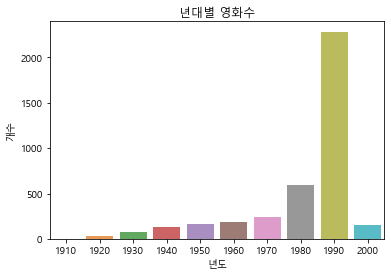

In [44]:
# pip install seaborn
sns.barplot(movie_year_term.index,movie_year_term.values,alpha=0.8)
plt.title('년대별 영화수')
plt.ylabel('개수')
plt.xlabel('년도')
plt.show()

장르별 검색 - movie_data : genre

In [45]:
movie_data.head(2)

,movie_id,title,genre,year,year_term
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,1990
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,1990


In [48]:
# Action이 포함되어 있는 영화 개수
# movie_data : genre-Action : 503개
len(movie_data[movie_data['genre'].str.contains('Action')])

503

In [51]:
# Action 만 있는 개수
data = movie_data['genre'].apply(lambda x : x=='Action')
len(movie_data[data])

65

In [55]:
movie_data['genre'].value_counts()[:10]

Drama             843
Comedy            521
Horror            178
Comedy|Drama      162
Comedy|Romance    142
Drama|Romance     134
Documentary       116
Thriller          101
Action             65
Drama|Thriller     63
Name: genre, dtype: int64

장르별 영화 개수

In [56]:
movie_data.columns

Index(['movie_id', 'title', 'genre', 'year', 'year_term'], dtype='object')

In [57]:
movie_data['genre'][:5]

0     Animation|Children's|Comedy
1    Adventure|Children's|Fantasy
2                  Comedy|Romance
3                    Comedy|Drama
4                          Comedy
Name: genre, dtype: object

In [ ]:
# Drama:843, Comedy:521
unique_genre_dict={}
for index,row in movie_data.iterrows():
    genre_combination = row['genre'] # Animation|Children's|Comedy